In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Since we have multiple sheets in the excel first we need to anlyze each sheets have how many columns
#Secondly we have to merge the data to have all columns in one excel with respect to customerID which is a common column in all the sheets
df_demo = pd.read_excel(r"C:\Users\dddiv\OneDrive\Desktop\Customer_Churn_Data_Large.xlsx", sheet_name=0)
df_demo 

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [29]:
df_trans = pd.read_excel(r"C:\Users\dddiv\OneDrive\Desktop\Customer_Churn_Data_Large.xlsx", sheet_name=1)
df_trans

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing
...,...,...,...,...,...
5049,1000,2724,2022-09-08,232.06,Groceries
5050,1000,2917,2022-12-13,324.98,Books
5051,1000,2979,2022-06-15,375.34,Groceries
5052,1000,8594,2022-04-08,166.73,Books


In [30]:
df_ser = pd.read_excel(r"C:\Users\dddiv\OneDrive\Desktop\Customer_Churn_Data_Large.xlsx", sheet_name=2)
df_ser

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved
...,...,...,...,...,...
997,990,3671,2022-10-25,Complaint,Unresolved
998,992,2114,2022-09-29,Feedback,Unresolved
999,994,3087,2022-07-02,Complaint,Unresolved
1000,994,8508,2022-05-14,Complaint,Unresolved


In [35]:
df_online = pd.read_excel(r"C:\Users\dddiv\OneDrive\Desktop\Customer_Churn_Data_Large.xlsx", sheet_name=3)
df_online

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website
...,...,...,...,...
995,996,2023-01-29,38,Mobile App
996,997,2023-04-01,5,Mobile App
997,998,2023-07-10,47,Website
998,999,2023-01-08,23,Website


In [36]:
df_churnstatus = pd.read_excel(r"C:\Users\dddiv\OneDrive\Desktop\Customer_Churn_Data_Large.xlsx", sheet_name=4)
df_churnstatus 

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


In [39]:
df_merged = pd.merge(df_demo, df_trans, on='CustomerID', how='left')

In [45]:
df_merged = pd.merge(df_merged, df_ser,on='CustomerID', how='left')

In [46]:
df_merged = pd.merge(df_merged, df_online, on='CustomerID', how='left')

In [47]:
df_merged = pd.merge(df_merged, df_churnstatus, on='CustomerID', how='left')

In [52]:
#After merging all the sheets we need to save the data as a new excel
#Also we need to check wheter any duplicate columns occurs
df_merged.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID_x,...,InteractionType_x,ResolutionStatus_x,InteractionID_y,InteractionDate_y,InteractionType_y,ResolutionStatus_y,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,...,Inquiry,Resolved,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,...,Inquiry,Resolved,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,...,Inquiry,Resolved,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,...,Inquiry,Resolved,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,...,Inquiry,Resolved,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [49]:
df_merged.to_excel("Customer_Churn_Merged.xlsx", index=False, sheet_name='Merged_Data')


In [51]:
print(df_demo['CustomerID'].duplicated().sum())


0


In [55]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 10327
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          10328 non-null  int64         
 1   Age                 10328 non-null  int64         
 2   Gender              10328 non-null  object        
 3   MaritalStatus       10328 non-null  object        
 4   IncomeLevel         10328 non-null  object        
 5   TransactionID       10328 non-null  int64         
 6   TransactionDate     10328 non-null  datetime64[ns]
 7   AmountSpent         10328 non-null  float64       
 8   ProductCategory     10328 non-null  object        
 9   InteractionID_x     8720 non-null   float64       
 10  InteractionDate_x   8720 non-null   datetime64[ns]
 11  InteractionType_x   8720 non-null   object        
 12  ResolutionStatus_x  8720 non-null   object        
 13  InteractionID_y     8720 non-null   float64   

In [70]:
df1=df_merged.copy()

In [71]:
#dropping the unnecessary columns
df1.drop(['TransactionDate','InteractionDate_x','InteractionDate_y','LastLoginDate'], axis=1, inplace=True)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 10327
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          10328 non-null  int64  
 1   Age                 10328 non-null  int64  
 2   Gender              10328 non-null  object 
 3   MaritalStatus       10328 non-null  object 
 4   IncomeLevel         10328 non-null  object 
 5   TransactionID       10328 non-null  int64  
 6   AmountSpent         10328 non-null  float64
 7   ProductCategory     10328 non-null  object 
 8   InteractionID_x     8720 non-null   float64
 9   InteractionType_x   8720 non-null   object 
 10  ResolutionStatus_x  8720 non-null   object 
 11  InteractionID_y     8720 non-null   float64
 12  InteractionType_y   8720 non-null   object 
 13  ResolutionStatus_y  8720 non-null   object 
 14  LoginFrequency      10328 non-null  int64  
 15  ServiceUsage        10328 non-null  object 
 16  Chur

In [61]:
# Missing value/Null value
df1.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
MaritalStatus            0
IncomeLevel              0
TransactionID            0
AmountSpent              0
ProductCategory          0
InteractionID_x       1608
InteractionType_x     1608
ResolutionStatus_x    1608
InteractionID_y       1608
InteractionType_y     1608
ResolutionStatus_y    1608
LoginFrequency           0
ServiceUsage             0
ChurnStatus              0
dtype: int64

In [72]:
#Treating the missing values
df1['ResolutionStatus_x'].fillna('No Interaction', inplace=True)
df1['InteractionType_x'].fillna('None', inplace=True)
df1['ResolutionStatus_y'].fillna('No Interaction', inplace=True)
df1['InteractionType_y'].fillna('None', inplace=True)

In [74]:
#dropping unnecessary columns
df1.drop(['InteractionID_x','InteractionID_y'], axis=1, inplace=True)

In [76]:
df1.isnull().sum()

CustomerID            0
Age                   0
Gender                0
MaritalStatus         0
IncomeLevel           0
TransactionID         0
AmountSpent           0
ProductCategory       0
InteractionType_x     0
ResolutionStatus_x    0
InteractionType_y     0
ResolutionStatus_y    0
LoginFrequency        0
ServiceUsage          0
ChurnStatus           0
dtype: int64

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 10327
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          10328 non-null  int64  
 1   Age                 10328 non-null  int64  
 2   Gender              10328 non-null  object 
 3   MaritalStatus       10328 non-null  object 
 4   IncomeLevel         10328 non-null  object 
 5   TransactionID       10328 non-null  int64  
 6   AmountSpent         10328 non-null  float64
 7   ProductCategory     10328 non-null  object 
 8   InteractionType_x   10328 non-null  object 
 9   ResolutionStatus_x  10328 non-null  object 
 10  InteractionType_y   10328 non-null  object 
 11  ResolutionStatus_y  10328 non-null  object 
 12  LoginFrequency      10328 non-null  int64  
 13  ServiceUsage        10328 non-null  object 
 14  ChurnStatus         10328 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.3+

In [108]:
df1.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,AmountSpent,ResolutionStatus_x,ResolutionStatus_y,LoginFrequency,...,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries,InteractionType_x_Feedback,InteractionType_x_Inquiry,InteractionType_x_None,InteractionType_y_Feedback,InteractionType_y_Inquiry,InteractionType_y_None
0,1,62,1,2,1,7194,416.50,1,1,34,...,0,1,0,0,0,1,0,0,1,0
1,2,65,1,1,1,7250,54.96,1,1,5,...,1,0,0,0,0,1,0,0,1,0
2,2,65,1,1,1,9660,197.50,1,1,5,...,0,1,0,0,0,1,0,0,1,0
3,2,65,1,1,1,2998,101.31,1,1,5,...,0,0,1,0,0,1,0,0,1,0
4,2,65,1,1,1,1228,397.37,1,1,5,...,1,0,0,0,0,1,0,0,1,0


In [109]:
# We have some categorical columns with datatype object which is to be converted as numerical values
#Using LabelEncoder we transform Gender, Income level, MaritalStatus, ServiceUsage and Resolution Status
#Using One hot enoder for nominal columns like ProductCategory,InteractionType_x, InteractionType_y

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])  
df1['MaritalStatus'] = le.fit_transform(df1['MaritalStatus'])
df1['IncomeLevel'] = le.fit_transform(df1['IncomeLevel'])
df1['ResolutionStatus_x'] = le.fit_transform(df1['ResolutionStatus_x'])
df1['ResolutionStatus_y'] = le.fit_transform(df1['ResolutionStatus_y'])
df1['ServiceUsage'] = le.fit_transform(df1['ServiceUsage'])

In [102]:
print(df1.columns.tolist())


['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel', 'TransactionID', 'AmountSpent', 'ResolutionStatus_x', 'InteractionType_y', 'ResolutionStatus_y', 'LoginFrequency', 'ServiceUsage', 'ChurnStatus', 'ProductCategory_Clothing', 'ProductCategory_Electronics', 'ProductCategory_Furniture', 'ProductCategory_Groceries', 'InteractionType_x_Feedback', 'InteractionType_x_Inquiry', 'InteractionType_x_None']


In [107]:
df1 = pd.get_dummies(df1, columns=['InteractionType_y'], drop_first=True)


In [110]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 10327
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   10328 non-null  int64  
 1   Age                          10328 non-null  int64  
 2   Gender                       10328 non-null  int64  
 3   MaritalStatus                10328 non-null  int64  
 4   IncomeLevel                  10328 non-null  int64  
 5   TransactionID                10328 non-null  int64  
 6   AmountSpent                  10328 non-null  float64
 7   ResolutionStatus_x           10328 non-null  int64  
 8   ResolutionStatus_y           10328 non-null  int64  
 9   LoginFrequency               10328 non-null  int64  
 10  ServiceUsage                 10328 non-null  int32  
 11  ChurnStatus                  10328 non-null  int64  
 12  ProductCategory_Clothing     10328 non-null  uint8  
 13  ProductCategory_

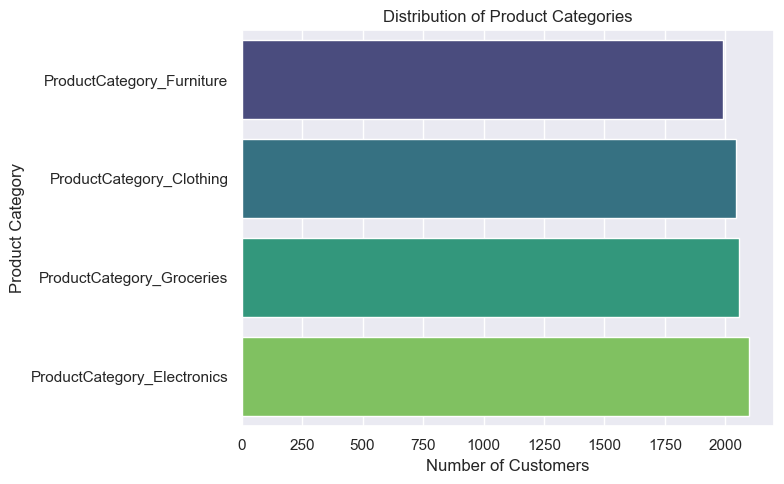

In [111]:
#Vizualization of Data

#Product Category wise Distribution

product_cols = [col for col in df1.columns if col.startswith('ProductCategory_')]
product_counts = df1[product_cols].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Number of Customers')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

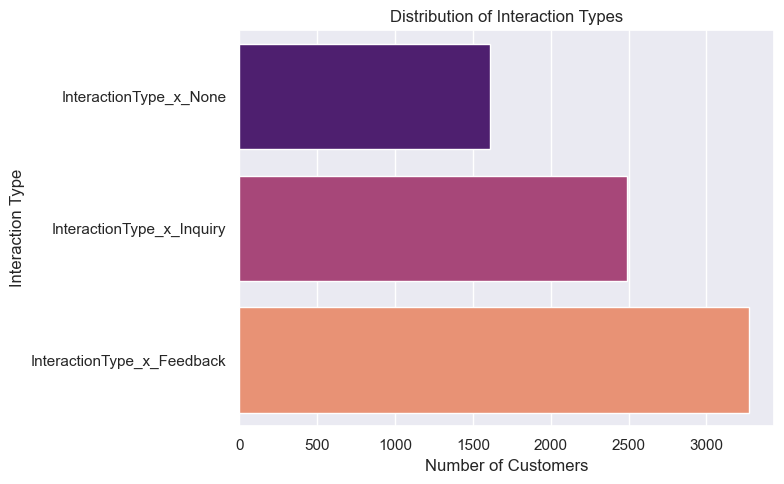

In [112]:
#Interaction Type Distribution

interaction_cols = [col for col in df1.columns if col.startswith('InteractionType_x_')]
interaction_counts = df1[interaction_cols].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=interaction_counts.values, y=interaction_counts.index, palette='magma')
plt.title('Distribution of Interaction Types')
plt.xlabel('Number of Customers')
plt.ylabel('Interaction Type')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

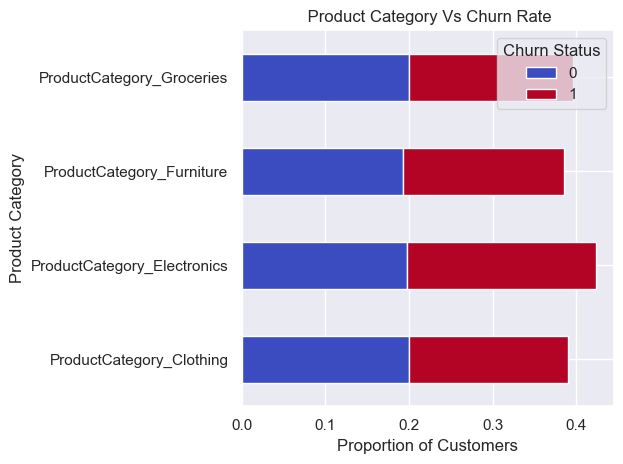

In [113]:
#Product Category vs Churn Rate

churn_by_prod = df1.groupby('ChurnStatus')[product_cols].mean().T

plt.figure(figsize=(8, 6))
churn_by_prod.plot(kind='barh', stacked=True, colormap='coolwarm')
plt.title(' Product Category Vs Churn Rate')
plt.xlabel('Proportion of Customers')
plt.ylabel('Product Category')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


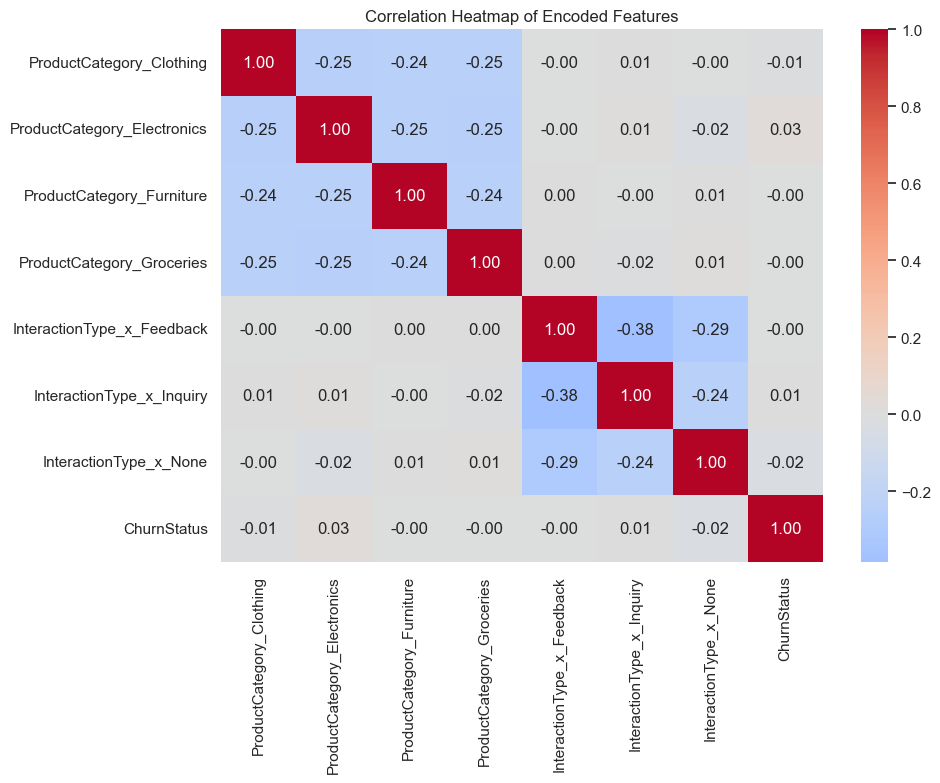

In [114]:
encoded_cols = product_cols + interaction_cols + ['ChurnStatus']
corr_matrix = df1[encoded_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Encoded Features')
plt.tight_layout()
plt.show()

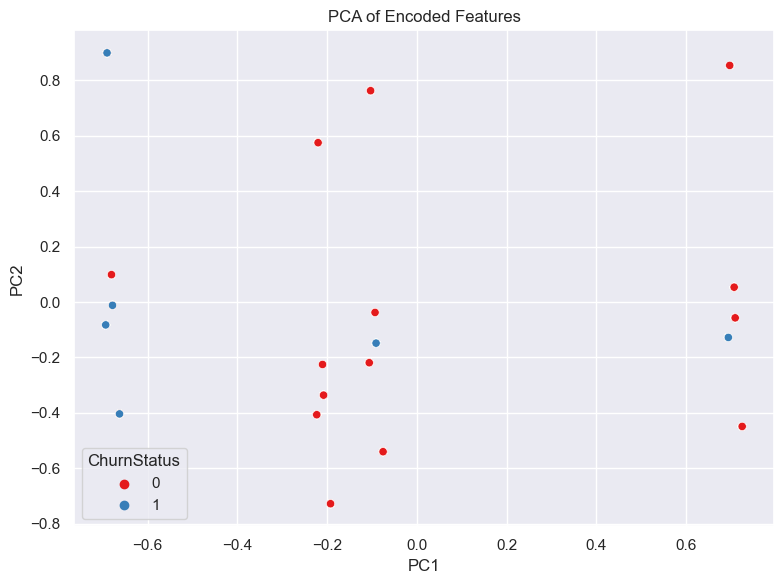

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1[product_cols + interaction_cols])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df1['ChurnStatus'], palette='Set1')
plt.title('PCA of Encoded Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()